Consensus Timeのプロット（単体）

In [2]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean


def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


1.9145239206534423


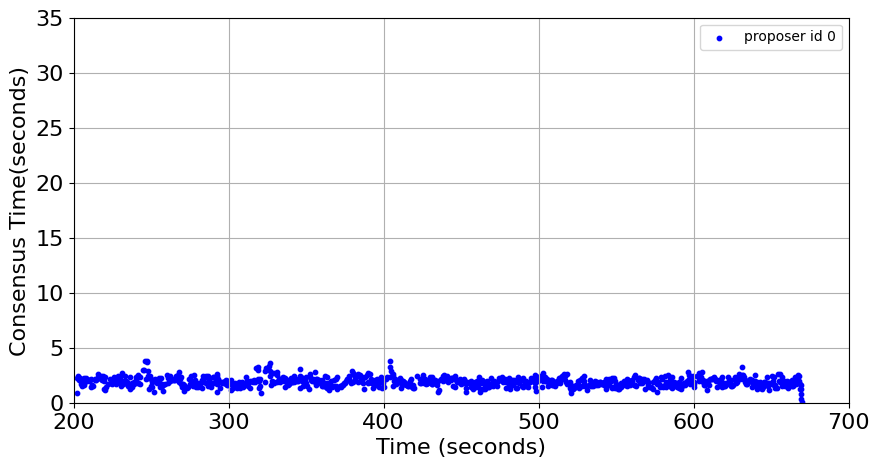

In [5]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 128
network_delay = 0
proposer_id_list = [1]

start_time_2lists = []
consensus_time_2lists = []


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v20/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    print(mean(consensus_time_list))
    start_time_2lists.append(start_time_list)
    consensus_time_2lists.append(consensus_time_list)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.scatter(start_time_2lists[0], consensus_time_2lists[0], c='blue', marker='o', s=10, label='proposer id 0')
# plt.scatter(start_time_2lists[1], consensus_time_2lists[1], c='green', marker='o', s=10, label='proposer id 1')
# plt.scatter(start_time_2lists[2], consensus_time_2lists[2], c='red', marker='o', s=10, label='proposer id 2')
plt.xlabel('Time (seconds)', fontsize=16)
plt.ylabel('Consensus Time(seconds)', fontsize=16)

plt.ylim(0, 35)
plt.xlim(200, 700)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend()
plt.show()






2.7378240223463686
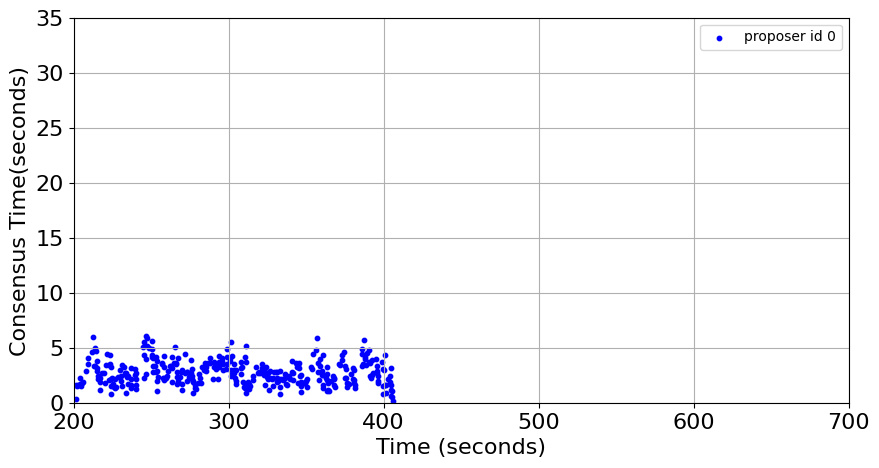

Consensus Timeのプロット（複数）

[[1.577116182572614], [1.522180055401662], [1.4451270949720671], [1.31824826629681]]


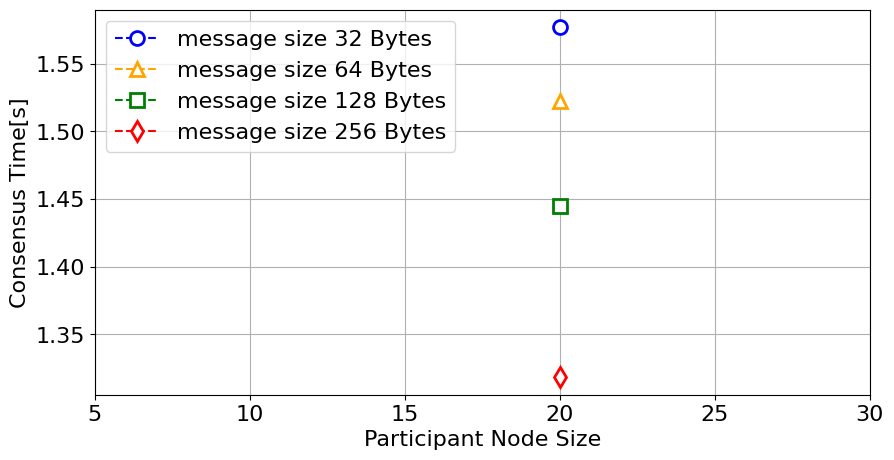

R² (Time ~ Node)          : 0.000
R² (Time ~ log2(Message)) : 0.965
R² (log(Time) ~ Node)     : 0.000
R² (log(Time) ~ log2(Msg)): 0.955


/tmp/ipykernel_91439/1128482660.py:64: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)  # y_hat = m*x + b
/tmp/ipykernel_91439/1128482660.py:64: RankWarning: Polyfit may be poorly conditioned
  m, b = np.polyfit(x, y, 1)  # y_hat = m*x + b


In [10]:
import numpy as np

# fixed_vehicle_num_list = [5, 10, 15, 20, 25, 30]
fixed_vehicle_num_list = [20]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size_list = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1

start_time_2lists = []
consensus_mean_time_2lists = []


for message_size in message_size_list:
    consensus_mean_time_list = []
    for fixed_vehicle_num in fixed_vehicle_num_list:

        input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v"  + str(fixed_vehicle_num) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/3/"
        start_time_list, consensus_time_list = get_consensus_time(input_folder_path)

        consensus_mean_time_list.append(mean(consensus_time_list))
    
    consensus_mean_time_2lists.append(consensus_mean_time_list)

print(consensus_mean_time_2lists)

# 3つwo1つのgraphにまとめる
plt.figure(figsize=(10, 5))
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[0], c='blue', marker='o', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 32 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[1], c='orange', marker='^', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 64 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[2], c='green', marker='s', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 128 Bytes')
plt.plot(fixed_vehicle_num_list, consensus_mean_time_2lists[3], c='red', marker='d', markersize=10, markerfacecolor='white', markeredgewidth=2, linestyle='--', label='message size 256 Bytes')

plt.xlabel('Participant Node Size', fontsize=16)
plt.ylabel('Consensus Time[s]', fontsize=16)

plt.xticks(range(5, 31, 5),fontsize=16)
plt.yticks(fontsize=16)

plt.grid(True)
plt.legend(fontsize=16)
plt.show()


import numpy as np

def _r2_linear(x, y):
    """
    Compute R^2 of simple linear regression with intercept: y ~ a*x + b.
    Returns: float in [0, 1], or 0.0 if y has zero variance.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)

    # Total variance zero -> undefined slope; treat as no explanatory power
    if np.allclose(y.var(), 0.0):
        return 0.0

    # Fit a straight line with intercept
    m, b = np.polyfit(x, y, 1)  # y_hat = m*x + b
    y_hat = m * x + b

    # Residual and total sum of squares
    ss_res = np.sum((y - y_hat) ** 2)
    ss_tot = np.sum((y - y.mean()) ** 2)

    # Numerical safety
    if np.isclose(ss_tot, 0.0):
        return 0.0
    return 1 - ss_res / ss_tot


def r2_from_matrix(times_2d, node_levels, msg_sizes, use_logy=False):
    """
    Calculate R^2 for two separate simple regressions over all observations:
      1) Time ~ Node
      2) Time ~ log2(Message)

    Parameters
    ----------
    times_2d : array-like, shape (M, N)
        Matrix of consensus times. Rows = message sizes, columns = node levels.
    node_levels : array-like, length N
        Node counts corresponding to the columns of times_2d (e.g., [5,10,15,20,25,30]).
    msg_sizes : array-like, length M
        Message sizes corresponding to the rows of times_2d (e.g., [32,64,128,256]).
    use_logy : bool, default False
        If True, regress on log(Time) instead of Time to stabilize variance.

    Returns
    -------
    (r2_node, r2_log2msg) : tuple of floats
        R^2 for Time ~ Node (or log(Time) ~ Node) and Time ~ log2(Message)
        (or log(Time) ~ log2(Message)) respectively.
    """
    T = np.asarray(times_2d, dtype=float)
    if T.ndim != 2:
        raise ValueError("times_2d must be a 2D array (rows=messages, cols=nodes).")

    M, N = T.shape
    node_levels = np.asarray(node_levels, dtype=float)
    msg_sizes   = np.asarray(msg_sizes, dtype=float)

    if node_levels.size != N:
        raise ValueError(f"len(node_levels)={node_levels.size} must equal number of columns N={N}.")
    if msg_sizes.size != M:
        raise ValueError(f"len(msg_sizes)={msg_sizes.size} must equal number of rows M={M}.")

    # Flatten all observations row-wise: [row0..., row1..., ...]
    y = T.ravel(order="C")
    if use_logy:
        if np.any(y <= 0):
            raise ValueError("log(Time) requested but times contain non-positive values.")
        y = np.log(y)

    # Explanatory variables aligned with the flattened order
    x_node = np.tile(node_levels, M)                  # repeat node levels for each message row
    x_msg_log2 = np.repeat(np.log2(msg_sizes), N)     # repeat log2(message) for each node within a row

    # Compute R^2 for each simple regression
    r2_node = _r2_linear(x_node, y)
    r2_msg  = _r2_linear(x_msg_log2, y)
    return r2_node, r2_msg

def transpose_matrix(times_2d):
    """
    Return the transpose of a 2D matrix (rows <-> columns).

    Parameters
    ----------
    times_2d : array-like, shape (M, N)
        Original matrix.

    Returns
    -------
    Tt : np.ndarray, shape (N, M)
        Transposed matrix.
    """
    T = np.asarray(times_2d, dtype=float)
    if T.ndim != 2:
        raise ValueError("times_2d must be 2D.")
    return T.T.copy()
# ===== 使い方サンプル（あなたのデータ） =====
# node_levels = [5, 10, 15, 20, 25, 30]
node_levels = [20]
msg_sizes   = [32, 64, 128, 256]

r2_node, r2_msg = r2_from_matrix(consensus_mean_time_2lists, node_levels, msg_sizes,use_logy=False)
r2_node_logy, r2_msg_logy = r2_from_matrix(consensus_mean_time_2lists, node_levels, msg_sizes, use_logy=True)

print(f"R² (Time ~ Node)          : {r2_node:.3f}")
print(f"R² (Time ~ log2(Message)) : {r2_msg:.3f}")
print(f"R² (log(Time) ~ Node)     : {r2_node_logy:.3f}")
print(f"R² (log(Time) ~ log2(Msg)): {r2_msg_logy:.3f}")

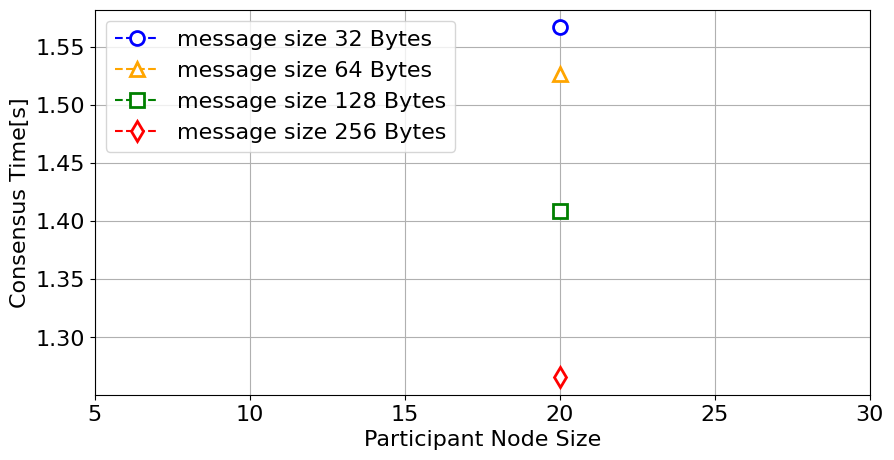

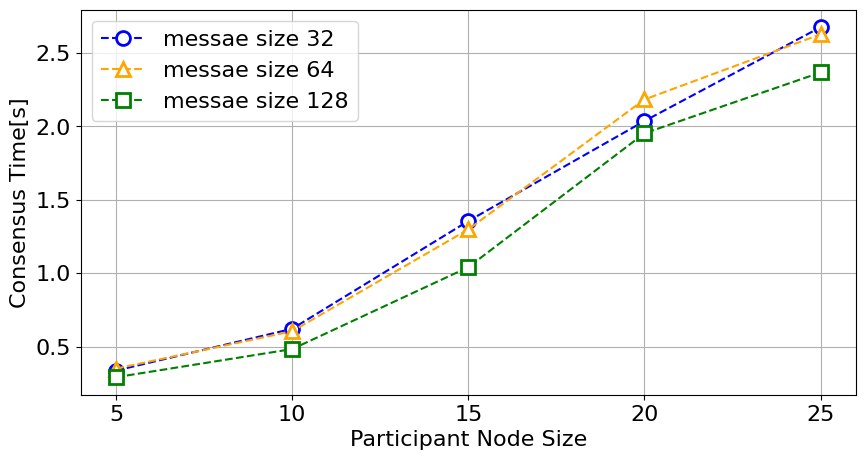

0.00863716814159292 0.07430088495575221 0.22175221238938053
0.013672064777327936 0.10834008097165992 0.5622955465587045
0.009798624754420433 0.1394548133595285 1.048303536345776
0.009477958236658934 0.21881438515081206 1.841792343387471
0.008703098106712565 0.2958657487091222 2.5544535283993115


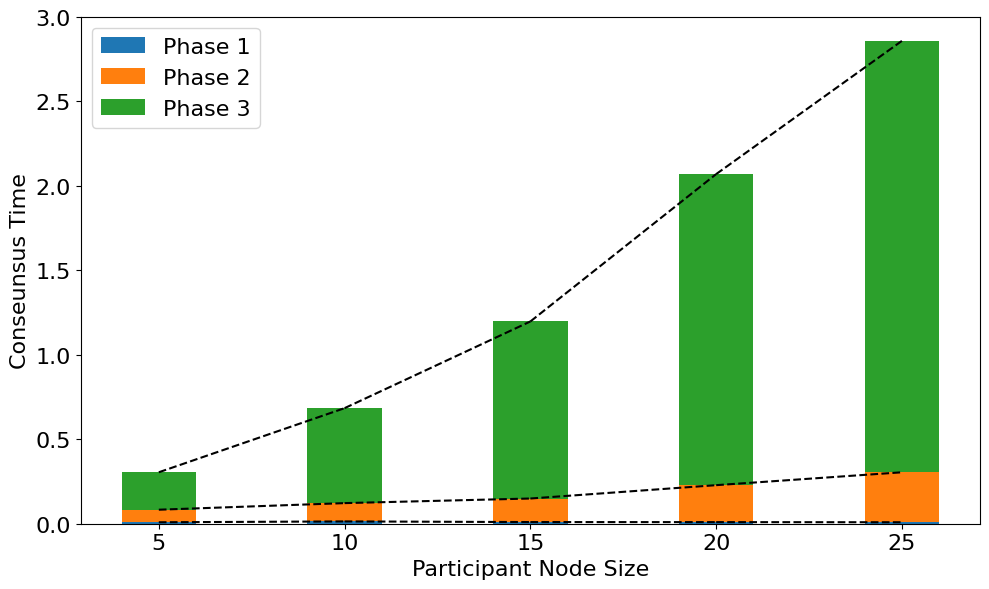

In [17]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np


def get_phase_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []
    simulation_phase_1_time_list = []
    simulation_phase_2_time_list = []
    simulation_phase_3_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)

        simulation_phase_1_time_list.append((int(row["end_phase_a_pro_time"]) - int(row["start_time"])) / 1000)
        simulation_phase_2_time_list.append((int(row["end_phase_a_vali_time"]) - int(row["end_phase_a_pro_time"])) / 1000)
        simulation_phase_3_time_list.append((int(row["end_time"]) - int(row["end_phase_a_vali_time"])) / 1000)

    print(mean(simulation_phase_1_time_list), mean(simulation_phase_2_time_list), mean(simulation_phase_3_time_list))
    


    return mean(simulation_phase_1_time_list), mean(simulation_phase_2_time_list), mean(simulation_phase_3_time_list)



fixed_vehicle_num_list = [5, 10, 15, 20, 25]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id = 1

simulation_phase_1_time_list = []
simulation_phase_2_time_list = []
simulation_phase_3_time_list = []

for fixed_vehicle_num in fixed_vehicle_num_list:
    input_folder_path = "../../results/multi_rsu_congestion_fixed_vehicle_num/fixed_v"  + str(fixed_vehicle_num) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    simulation_phase_1_time, simulation_phase_2_time, simulation_phase_3_time = get_phase_time(input_folder_path)
    simulation_phase_1_time_list.append(simulation_phase_1_time)
    simulation_phase_2_time_list.append(simulation_phase_2_time)
    simulation_phase_3_time_list.append(simulation_phase_3_time)

    

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 2.0

# Convert lists to numpy arrays for stacking
phase_1 = np.array(simulation_phase_1_time_list)
phase_2 = np.array(simulation_phase_2_time_list)
phase_3 = np.array(simulation_phase_3_time_list)

# Plot each phase stacked on top of each other
ax.bar(fixed_vehicle_num_list, phase_1, bar_width, label='Phase 1')
ax.bar(fixed_vehicle_num_list, phase_2, bar_width, bottom=phase_1, label='Phase 2')
ax.bar(fixed_vehicle_num_list, phase_3, bar_width, bottom=phase_1 + phase_2, label='Phase 3')

# 各Phaseの上に点線を追加
for i in range(len(fixed_vehicle_num_list) - 1):
    x1, x2 = fixed_vehicle_num_list[i], fixed_vehicle_num_list[i+1]
    ax.plot([x1, x2], [phase_1[i], phase_1[i+1]], 'k--')  # Phase 1
    ax.plot([x1, x2], [phase_1[i] + phase_2[i], phase_1[i+1] + phase_2[i+1]], 'k--')  # Phase 2
    ax.plot([x1, x2], [phase_1[i] + phase_2[i] + phase_3[i], phase_1[i+1] + phase_2[i+1] + phase_3[i+1]], 'k--')  # Phase 3


# Add labels, legend, and title
ax.set_xlabel('Participant Node Size', fontsize=16)
ax.set_ylabel('Conseunsus Time', fontsize=16)
# ax.set_title('Simulation Phase Times by Fixed Vehicle Number', fontsize=16)
ax.set_xticks(fixed_vehicle_num_list)
ax.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Show plot
plt.tight_layout()
plt.show()




 message_size  phase1_mean_s  phase2_mean_s  phase3_mean_s  total_mean_s
           32          0.009          0.296          2.554         2.859
           64          0.009          0.295          2.450         2.754
          128          0.007          0.264          2.234         2.505
          256          0.006          0.239          2.073         2.318


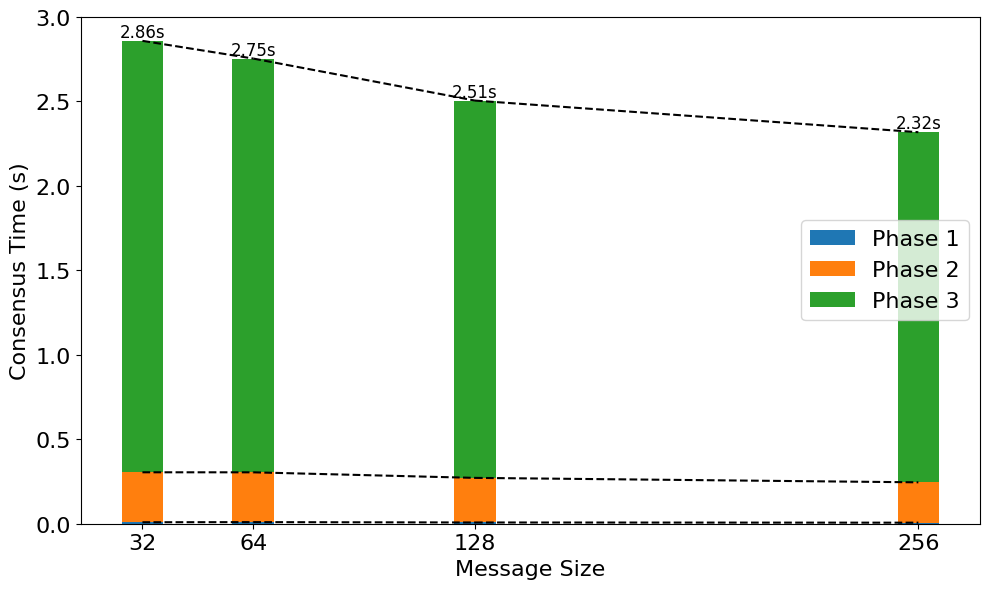

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np


def get_phase_time(input_folder_path):
    """
    指定フォルダの consensus_folder.csv から Phase-1/2/3 の
    平均時間（秒）を返す。
    """
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    phase1_list, phase2_list, phase3_list = [], [], []

    for index, row in proposer_df.iterrows():
        # 必須列の欠損はスキップ
        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue

        # フェーズ計算（ms→s）
        phase1 = (int(row["end_phase_a_pro_time"]) - int(row["start_time"])) / 1000
        phase2 = (int(row["end_phase_a_vali_time"]) - int(row["end_phase_a_pro_time"])) / 1000
        phase3 = (int(row["end_time"]) - int(row["end_phase_a_vali_time"])) / 1000

        phase1_list.append(phase1)
        phase2_list.append(phase2)
        phase3_list.append(phase3)

    def _avg(lst): 
        return mean(lst) if len(lst) > 0 else 0.0

    return _avg(phase1_list), _avg(phase2_list), _avg(phase3_list)


# ===== パラメータ =====
fixed_vehicle_num = 25
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_sizes = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1

# 出力用配列
phase1_means, phase2_means, phase3_means = [], [], []

# 各 message_size で平均フェーズ時間を計算
for msize in message_sizes:
    input_folder_path = (
        "../../results/multi_rsu_congestion_fixed_vehicle_num paper/"
        f"fixed_v{fixed_vehicle_num}/n{participant_size}/m{msize}/d{network_delay}/{proposer_id}/"
    )
    p1, p2, p3 = get_phase_time(input_folder_path)
    phase1_means.append(p1)
    phase2_means.append(p2)
    phase3_means.append(p3)

# ===== 値を表で出力（合計含む） =====
totals = [p1 + p2 + p3 for p1, p2, p3 in zip(phase1_means, phase2_means, phase3_means)]
df = pd.DataFrame({
    "message_size": message_sizes,
    "phase1_mean_s": phase1_means,
    "phase2_mean_s": phase2_means,
    "phase3_mean_s": phase3_means,
    "total_mean_s": totals,
})

# 小数3桁で表示
print(df.to_string(index=False, float_format="%.3f"))

# 必要なら CSV 保存
df.to_csv("phase_times_summary.csv", index=False)

# ===== プロット =====
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 12.0

phase_1 = np.array(phase1_means)
phase_2 = np.array(phase2_means)
phase_3 = np.array(phase3_means)

# スタック棒
ax.bar(message_sizes, phase_1, bar_width, label='Phase 1')
ax.bar(message_sizes, phase_2, bar_width, bottom=phase_1, label='Phase 2')
ax.bar(message_sizes, phase_3, bar_width, bottom=phase_1 + phase_2, label='Phase 3')

# 合計値の注釈
for i, x in enumerate(message_sizes):
    total = phase_1[i] + phase_2[i] + phase_3[i]
    ax.text(x, total, f"{total:.2f}s", ha='center', va='bottom', fontsize=12)

# 参考：各フェーズ境界の点線（任意）
for i in range(len(message_sizes) - 1):
    x1, x2 = message_sizes[i], message_sizes[i+1]
    ax.plot([x1, x2], [phase_1[i], phase_1[i+1]], 'k--')  # Phase 1 境界
    ax.plot([x1, x2], [phase_1[i] + phase_2[i], phase_1[i+1] + phase_2[i+1]], 'k--')  # Phase 2 境界
    ax.plot([x1, x2], [phase_1[i] + phase_2[i] + phase_3[i], 
                       phase_1[i+1] + phase_2[i+1] + phase_3[i+1]], 'k--')  # 合計

ax.set_xlabel('Message Size', fontsize=16)
ax.set_ylabel('Consensus Time (s)', fontsize=16)
ax.set_xticks(message_sizes)
ax.legend(fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()


合意形成時間が始まって終わるまでの時間

 vehicle_num  message_size  span_seconds
           5            32        59.008
           5            64        58.729
           5           128        55.997
           5           256        58.765
          10            32       132.650
          10            64       131.659
          10           128       131.788
          10           256       133.398
          15            32       547.879
          15            64       535.788
          15           128       545.798
          15           256       273.871
          20            32       473.042
          20            64       466.830
          20           128       469.759
          20           256       471.980
          25            32       655.201
          25            64       654.025
          25           128       662.262
          25           256       661.960


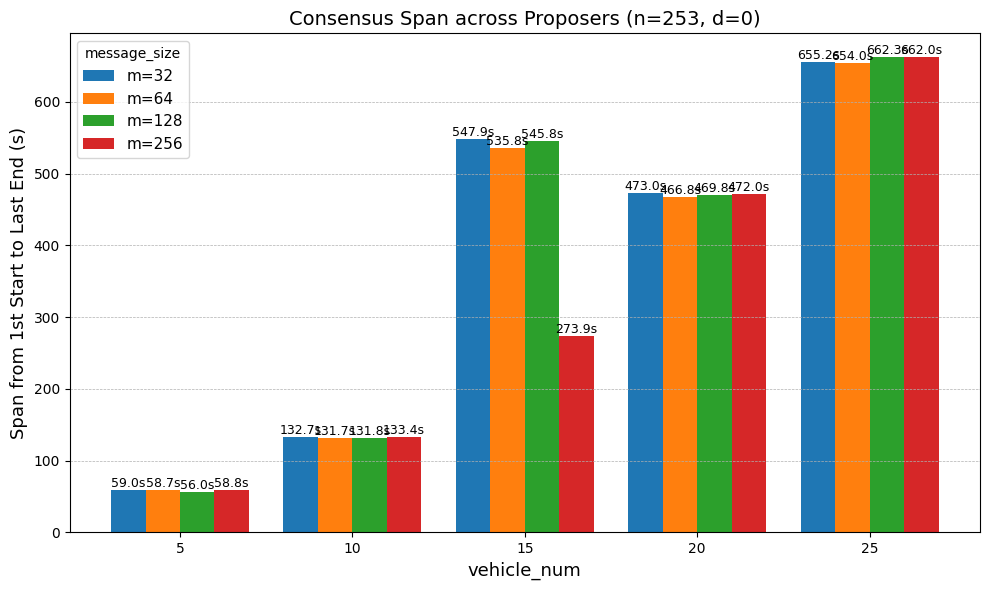

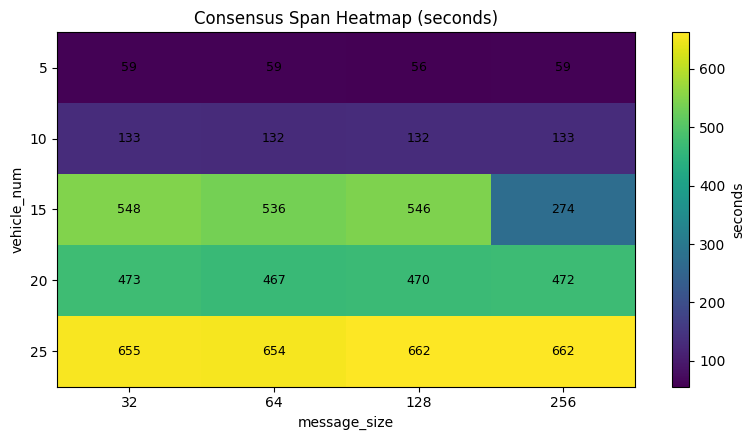

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ================== 固定パラメータ ==================
proposer_ids     = [0, 1, 2]           # 3 RSUs (= Proposers)
proposer_num     = 3
validator_num    = 250
participant_size = proposer_num + validator_num  # 253
network_delay    = 0

# 変化させるパラメータ（ユーザ指定どおり）
vehicle_nums  = [5, 10, 15, 20, 25]          # ← 指定順のまま
message_sizes = [32, 64, 128, 256]

# 実験ルート（必要に応じて変更）
ROOT = Path("../../results/multi_rsu_congestion_fixed_vehicle_num paper")

# ================== ユーティリティ ==================
def _to_num(s):
    """'null'や空文字をNaNにしつつ数値化"""
    return pd.to_numeric(pd.Series(s).replace('null', pd.NA), errors="coerce").iloc[0]

def read_consensus_csv(folder: Path) -> pd.DataFrame:
    """
    consensus_folder.csv を読み込んで整形（時刻は数値化）。
    欠損はそのまま残す（後段で必要列のNaN行は除く）。
    """
    f = folder / "consensus_folder.csv"
    if not f.exists():
        return pd.DataFrame()

    df = pd.read_csv(f)
    df = df.replace('null', pd.NA)

    for col in ["start_time", "end_phase_a_pro_time", "end_phase_a_vali_time", "end_time", "duration"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    return df

def span_time_seconds_for_config(vehicle_num: int, message_size: int) -> float:
    """
    指定 (vehicle_num, message_size) について、
    全 proposer の consensus_folder.csv を合算し、
    「最初のコンセンサスが始まって最後のコンセンサスが終わるまでの時間 [秒]」
    = (max(end_time) - min(start_time)) / 1000 を返す。

    データが無い場合は np.nan を返す。
    """
    all_rows = []

    for pid in proposer_ids:
        folder = (
            ROOT
            / f"fixed_v{vehicle_num}"
            / f"n{participant_size}"
            / f"m{message_size}"
            / f"d{network_delay}"
            / f"{pid}"
        )
        df = read_consensus_csv(folder)
        if not df.empty:
            all_rows.append(df)

    if not all_rows:
        return np.nan

    merged = pd.concat(all_rows, ignore_index=True)

    # 開始/終了の両方が数値で入っている行のみ対象
    merged = merged.dropna(subset=["start_time", "end_time"])
    if merged.empty:
        return np.nan

    min_start = merged["start_time"].min()
    max_end   = merged["end_time"].max()
    # ミリ秒 → 秒
    span_sec  = (max_end - min_start) / 1000.0
    return float(span_sec)

# ================== 集計 ==================
records = []
for v in vehicle_nums:
    for m in message_sizes:
        span_s = span_time_seconds_for_config(v, m)
        records.append({"vehicle_num": v, "message_size": m, "span_seconds": span_s})

df = pd.DataFrame(records)

# 表示と保存
if df.empty or df["span_seconds"].isna().all():
    print("No usable consensus data found for the specified parameters/paths.")
else:
    df_sorted = df.sort_values(["vehicle_num", "message_size"]).reset_index(drop=True)
    print(df_sorted.to_string(index=False, float_format="%.3f"))
    df_sorted.to_csv("consensus_span_by_vnum_msize.csv", index=False)

    # ================== 可視化（グループ化棒グラフ） ==================
    # x軸: vehicle_num、各グループ内に message_size の棒を並べる
    pivot = df.pivot_table(index="vehicle_num", columns="message_size",
                           values="span_seconds", aggfunc="mean").reindex(index=vehicle_nums)

    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(pivot.index))
    mcols = [m for m in message_sizes if m in pivot.columns]
    k = len(mcols)
    width = 0.8 / max(k, 1)

    for i, m in enumerate(mcols):
        y = pivot[m].values
        ax.bar(x + (i - (k-1)/2) * width, y, width, label=f"m={m}")
        # 注釈（値）
        for xi, yi in zip(x, y):
            if not np.isnan(yi):
                ax.text(xi + (i - (k-1)/2) * width, yi, f"{yi:.1f}s",
                        ha="center", va="bottom", fontsize=9)

    ax.set_xlabel("vehicle_num", fontsize=13)
    ax.set_ylabel("Span from 1st Start to Last End (s)", fontsize=13)
    ax.set_title(f"Consensus Span across Proposers (n={participant_size}, d={network_delay})", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels([str(v) for v in vehicle_nums])
    ax.legend(title="message_size", fontsize=11)
    ax.grid(True, axis="y", linestyle="--", linewidth=0.5)

    plt.tight_layout()
    plt.show()

    # ================== 参考：ヒートマップ（好みで使う） ==================
    # （棒グラフよりも一望したい場合）
    try:
        fig2, ax2 = plt.subplots(figsize=(8, 4.5))
        # pivot の行=vehicle_num, 列=message_size
        im = ax2.imshow(pivot.values, aspect="auto")
        ax2.set_xticks(np.arange(len(pivot.columns)))
        ax2.set_yticks(np.arange(len(pivot.index)))
        ax2.set_xticklabels([str(c) for c in pivot.columns])
        ax2.set_yticklabels([str(r) for r in pivot.index])
        ax2.set_xlabel("message_size")
        ax2.set_ylabel("vehicle_num")
        ax2.set_title("Consensus Span Heatmap (seconds)")

        # 値をセルに記入
        for i in range(len(pivot.index)):
            for j in range(len(pivot.columns)):
                val = pivot.values[i, j]
                if not np.isnan(val):
                    ax2.text(j, i, f"{val:.0f}", ha="center", va="center", fontsize=9)
        plt.colorbar(im, ax=ax2, label="seconds")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"(Heatmap skipped) {e}")


ブロックの数ごとの合意形成時間の違い

orderingフェーズ

 len_block_range  avg_ordering_time_s  count  message_size
              26                2.977  10000            32
              26                2.857  10000            64
              26                2.624  10000           128
              26                2.373  10000           256


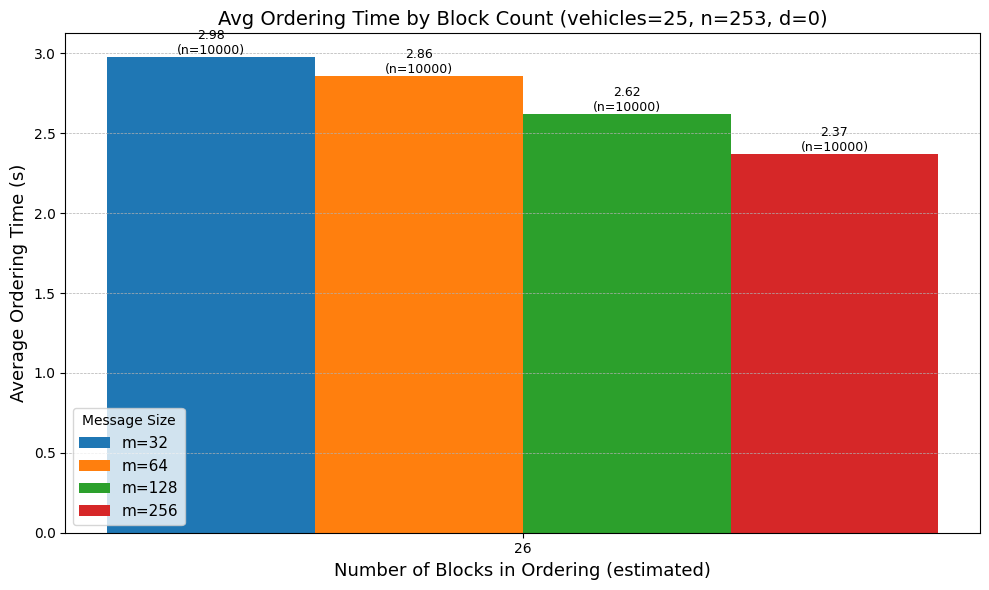

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# ===== 固定パラメータ =====
fixed_vehicle_num = 25
proposer_num      = 3
validator_num     = 250
participant_size  = proposer_num + validator_num  # = 253
message_sizes     = [32, 64, 128, 256]
network_delay     = 0
proposer_ids      = [0, 1, 2]

# 実験データのルート（必要に応じて変更）
ROOT = Path("../../results/multi_rsu_congestion_fixed_vehicle_num paper")

def _safe_to_numeric(series):
    """'null' や空文字を含む列を安全に数値化。"""
    return pd.to_numeric(series.replace('null', pd.NA), errors="coerce")

def _infer_block_count_from_text(x: str) -> float:
    """
    文字列に含まれる整数の個数を数えてブロック数とみなす。
    例: "1, 3, 4, 5, 6, 7" -> 6
    """
    if pd.isna(x):
        return np.nan
    # 数字を抽出
    nums = re.findall(r"\d+", str(x))
    return float(len(nums)) if nums else np.nan

def load_ordering_csv(folder: Path) -> pd.DataFrame:
    """
    ordering_event.csv を読み込み、必要列を整形して返す。
      - duration_s（秒）を作成（あれば duration / 1000、なければ end - start を使用）
      - len_block_range を優先して使用。無い/NaN の場合は block_range/block_ids のような列を探して
        文字列からブロック数を推定。どれも無ければ booth から整数の個数を推定（最後の手段）。
    """
    df = pd.read_csv(folder / "ordering_event.csv")
    df = df.replace('null', pd.NA)

    # 時刻系の数値化
    for col in ["start_time", "end_phase_a_pro_time", "end_phase_a_vali_time", "end_time", "duration"]:
        if col in df.columns:
            df[col] = _safe_to_numeric(df[col])

    # duration_s 作成
    if "duration" in df.columns and df["duration"].notna().any():
        df["duration_s"] = df["duration"] / 1000.0
    else:
        # フォールバック: end_time - start_time
        if "end_time" in df.columns and "start_time" in df.columns:
            df["duration_s"] = (df["end_time"] - df["start_time"]) / 1000.0
        else:
            df["duration_s"] = np.nan

    # ブロック数の推定
    block_count = None
    if "len_block_range" in df.columns:
        block_count = _safe_to_numeric(df["len_block_range"])

    # 代替の列名を探索（あれば文字列から個数を推定）
    if block_count is None or block_count.isna().all():
        for alt in ["block_range", "block_ids", "blocks"]:
            if alt in df.columns:
                block_count = df[alt].apply(_infer_block_count_from_text)
                break

    # それでも無い場合は booth から最後の手段で推定（CSV例では booth が "1, 3, 4, 5, 6, 7"）
    if block_count is None or block_count.isna().all():
        if "booth" in df.columns:
            block_count = df["booth"].apply(_infer_block_count_from_text)

    # 見つからなければ NaN のまま
    if block_count is None:
        df["len_block_range_est"] = np.nan
    else:
        df["len_block_range_est"] = block_count

    # 必須: duration_s と 推定ブロック数
    df = df.dropna(subset=["duration_s", "len_block_range_est"])
    # 整数化（浮動⼩数が入っても丸め）
    df["len_block_range_est"] = df["len_block_range_est"].astype(int)

    return df

def aggregate_ordering_for_message_size(msize: int) -> pd.DataFrame:
    """
    指定 message_size の ordering_event.csv（全 proposer）を統合し、
    推定されたブロック数（len_block_range_est）ごとの平均 ordering 時間（秒）と件数を返す。
    返り値: [len_block_range, avg_ordering_time_s, count, message_size]
    """
    all_rows = []
    for pid in proposer_ids:
        folder = (
            ROOT
            / f"fixed_v{fixed_vehicle_num}"
            / f"n{participant_size}"
            / f"m{msize}"
            / f"d{network_delay}"
            / f"{pid}"
        )
        if not (folder / "ordering_event.csv").exists():
            continue
        df = load_ordering_csv(folder)
        if df.empty:
            continue
        df["proposer_id"] = pid
        all_rows.append(df)

    if not all_rows:
        return pd.DataFrame(columns=["len_block_range", "avg_ordering_time_s", "count", "message_size"])

    merged = pd.concat(all_rows, ignore_index=True)

    grouped = (
        merged.groupby("len_block_range_est", as_index=False)
              .agg(avg_ordering_time_s=("duration_s", "mean"),
                   count=("duration_s", "size"))
              .rename(columns={"len_block_range_est": "len_block_range"})
              .sort_values("len_block_range")
              .reset_index(drop=True)
    )
    grouped["message_size"] = msize
    return grouped

# ===== 全 message_size をまとめて集計＆可視化 =====
parts_ord = [aggregate_ordering_for_message_size(ms) for ms in message_sizes]
combined_ord = pd.concat(parts_ord, ignore_index=True) if any(len(p) for p in parts_ord) else pd.DataFrame(
    columns=["len_block_range", "avg_ordering_time_s", "count", "message_size"]
)

if combined_ord.empty:
    print("No ordering_event.csv data found (or no usable rows) for the specified parameters / paths.")
else:
    # 表示と保存
    combined_ord_sorted = combined_ord.sort_values(["len_block_range", "message_size"]).reset_index(drop=True)
    print(combined_ord_sorted.to_string(index=False, float_format="%.3f"))
    combined_ord_sorted.to_csv("avg_ordering_time_by_block_count_all_m_v25.csv", index=False)

    # ピボットして グループ化棒グラフ（メッセージサイズ別）
    pivot_mean = combined_ord.pivot_table(
        index="len_block_range",
        columns="message_size",
        values="avg_ordering_time_s",
        aggfunc="mean"
    ).sort_index()

    pivot_count = combined_ord.pivot_table(
        index="len_block_range",
        columns="message_size",
        values="count",
        aggfunc="sum"
    ).reindex(index=pivot_mean.index, columns=pivot_mean.columns)

    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(pivot_mean.index))
    mcols = [c for c in message_sizes if c in pivot_mean.columns]
    k = len(mcols)
    width = 0.8 / max(k, 1)

    for i, m in enumerate(mcols):
        y = pivot_mean[m].values
        ax.bar(x + (i - (k-1)/2) * width, y, width, label=f"m={m}")
        cnt = pivot_count[m].values if pivot_count is not None else [np.nan] * len(y)
        for xi, yi, ci in zip(x, y, cnt):
            if not np.isnan(yi):
                ax.text(xi + (i - (k-1)/2) * width, yi, f"{yi:.2f}\n(n={int(ci)})",
                        ha="center", va="bottom", fontsize=9)

    ax.set_xlabel("Number of Blocks in Ordering (estimated)", fontsize=13)
    ax.set_ylabel("Average Ordering Time (s)", fontsize=13)
    ax.set_title(f"Avg Ordering Time by Block Count (vehicles=25, n={participant_size}, d={network_delay})", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_mean.index.astype(int))
    ax.legend(title="Message Size", fontsize=11)
    ax.grid(True, linestyle="--", linewidth=0.5, axis="y")

    plt.tight_layout()
    plt.show()


コンセンサスフェーズ

 len_block_range  avg_consensus_time_s  count  message_size
               1                 2.777      8            32
               1                 3.299     10            64
               1                 2.945      5           128
               1                 1.811      4           256
               2                 2.723     22            32
               2                 2.956     15            64
               2                 2.766     12           128
               2                 2.365     14           256
               3                 2.984     32            32
               3                 2.787     35            64
               3                 2.513     32           128
               3                 2.360     26           256
               4                 2.942     50            32
               4                 2.943     53            64
               4                 2.521     66           128
               4                 2.370  

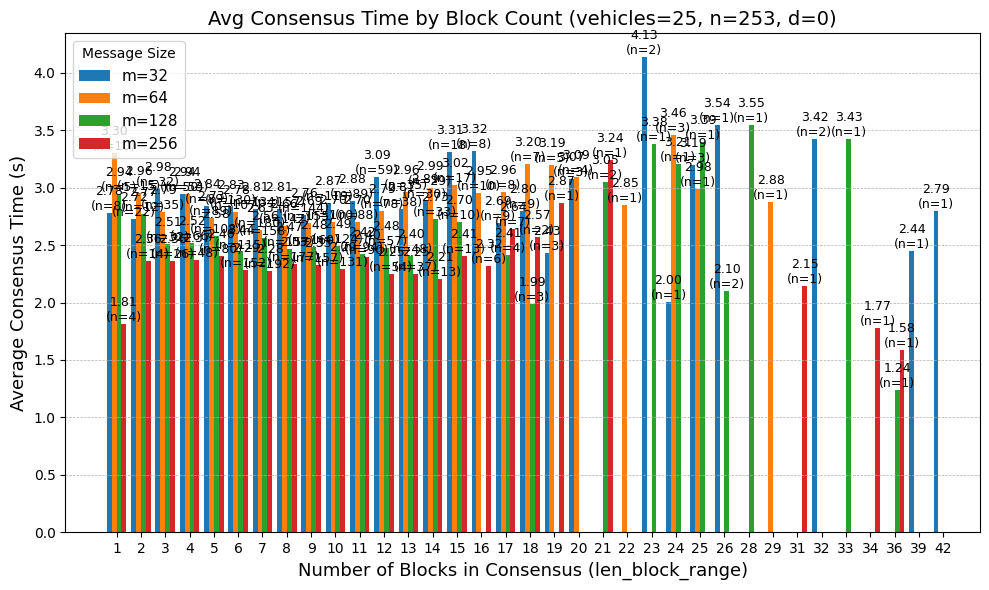

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ===== 固定パラメータ =====
fixed_vehicle_num = 25
proposer_num      = 3
validator_num     = 250
participant_size  = proposer_num + validator_num  # = 253
message_sizes     = [32, 64, 128, 256]           # ← 重ねる対象
network_delay     = 0
proposer_ids      = [0, 1, 2]                    # 3RSU (=Proposer) を集計

# ルートパス（必要に応じて変更）
ROOT = Path("../../results/multi_rsu_congestion_fixed_vehicle_num paper")

def load_consensus_csv(folder: Path) -> pd.DataFrame:
    """
    CSVを読み込み、必要な列を数値化して返す。
    durationは秒に変換（ms -> s）。
    """
    df = pd.read_csv(folder / "consensus_folder.csv")
    df = df.replace('null', pd.NA)

    # 型の揃え込み
    for col in ["start_time", "end_phase_a_pro_time", "end_phase_a_vali_time", "end_time", "duration", "len_block_range"]:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # 必須列の欠損を除去
    must_cols = ["end_time", "duration", "len_block_range"]
    df = df.dropna(subset=[c for c in must_cols if c in df.columns])

    # duration を秒へ
    df["duration_s"] = df["duration"] / 1000.0

    # len_block_range は整数へ
    df["len_block_range"] = df["len_block_range"].astype(int)

    return df

def aggregate_for_message_size(msize: int) -> pd.DataFrame:
    """
    指定 message_size の全 proposer を統合し、
    len_block_range（=合意ブロック数）ごとの平均合意形成時間(秒)と件数を返す。
    返り値: columns = [len_block_range, avg_consensus_time_s, count, message_size]
    """
    all_rows = []
    for pid in proposer_ids:
        folder = (
            ROOT
            / f"fixed_v{fixed_vehicle_num}"
            / f"n{participant_size}"
            / f"m{msize}"
            / f"d{network_delay}"
            / f"{pid}"
        )
        if not (folder / "consensus_folder.csv").exists():
            continue
        df = load_consensus_csv(folder)
        df["proposer_id"] = pid
        all_rows.append(df)

    if not all_rows:
        return pd.DataFrame(columns=["len_block_range", "avg_consensus_time_s", "count", "message_size"])

    merged = pd.concat(all_rows, ignore_index=True)

    grouped = (
        merged.groupby("len_block_range", as_index=False)
              .agg(avg_consensus_time_s=("duration_s", "mean"),
                   count=("duration_s", "size"))
              .sort_values("len_block_range")
              .reset_index(drop=True)
    )
    grouped["message_size"] = msize
    return grouped

# ===== 全 message_size をまとめる =====
parts = [aggregate_for_message_size(ms) for ms in message_sizes]
combined = pd.concat(parts, ignore_index=True) if any(len(p) for p in parts) else pd.DataFrame(
    columns=["len_block_range", "avg_consensus_time_s", "count", "message_size"]
)

if combined.empty:
    print("No data found for the specified parameters / paths.")
else:
    # 表（確認用）
    combined_sorted = combined.sort_values(["len_block_range", "message_size"]).reset_index(drop=True)
    print(combined_sorted.to_string(index=False, float_format="%.3f"))

    # 保存
    combined_sorted.to_csv("avg_consensus_time_by_block_count_all_m_v25.csv", index=False)

    # ===== ピボットして「合意ブロック数 × メッセージサイズ」の表を作成 =====
    pivot_mean = combined.pivot_table(
        index="len_block_range",
        columns="message_size",
        values="avg_consensus_time_s",
        aggfunc="mean"
    ).sort_index()

    # 件数のピボット（注釈用。なくても可）
    pivot_count = combined.pivot_table(
        index="len_block_range",
        columns="message_size",
        values="count",
        aggfunc="sum"
    ).reindex(index=pivot_mean.index, columns=pivot_mean.columns)

    # ======= グループ化棒グラフ（重ねがけ） =======
    fig, ax = plt.subplots(figsize=(10, 6))
    x = np.arange(len(pivot_mean.index))  # x 軸：合意ブロック数
    mcols = [c for c in message_sizes if c in pivot_mean.columns]  # データが存在する列の順序を固定
    k = len(mcols)
    width = 0.8 / max(k, 1)

    for i, m in enumerate(mcols):
        y = pivot_mean[m].values
        # NaN は描画されない（データがないブロック数は棒が出ない）
        ax.bar(x + (i - (k-1)/2) * width, y, width, label=f"m={m}")

        # 注釈（平均秒 & 件数）
        cnt = pivot_count[m].values if pivot_count is not None else [np.nan] * len(y)
        for xi, yi, ci in zip(x, y, cnt):
            if not np.isnan(yi):
                ax.text(xi + (i - (k-1)/2) * width, yi, f"{yi:.2f}\n(n={int(ci)})",
                        ha="center", va="bottom", fontsize=9)

    ax.set_xlabel("Number of Blocks in Consensus (len_block_range)", fontsize=13)
    ax.set_ylabel("Average Consensus Time (s)", fontsize=13)
    ax.set_title(f"Avg Consensus Time by Block Count (vehicles=25, n={participant_size}, d={network_delay})", fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(pivot_mean.index.astype(int))
    ax.legend(title="Message Size", fontsize=11)
    ax.grid(True, linestyle="--", linewidth=0.5, axis="y")

    plt.tight_layout()
    plt.show()


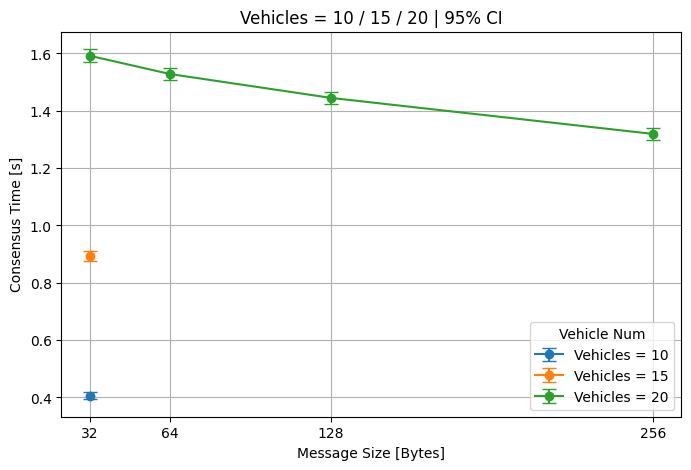

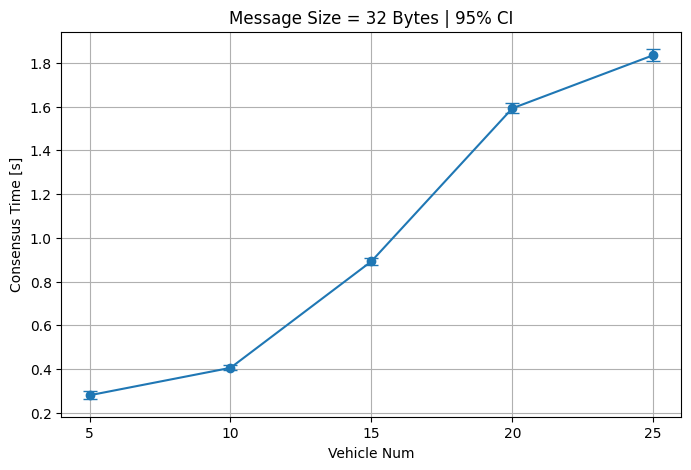

In [3]:
# --- ここから追記（get_consensus_time は変更しない） --------------------
import os
import math
from statistics import mean, stdev
import matplotlib.pyplot as plt

# 既存パラメータ（必要なものだけ使用）
fixed_vehicle_num_list = [5, 10, 15, 20, 25]
message_size_list = [32, 64, 128, 256]
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num   # 入力パス n〇〇〇 で使用
network_delay = 0
proposer_id = 1

# 入力パス生成（基準ディレクトリの末尾は必ず "/"）
def make_base_path(fixed_vehicle_num: int, message_size: int) -> str:
    return (
        "../../results/multi_rsu_congestion_fixed_vehicle_num/"
        f"fixed_v{fixed_vehicle_num}/n{participant_size}/m{message_size}/"
        f"d{network_delay}/{proposer_id}/"
    )

# 各実験(1〜10)の「1実験あたりの平均コンセンサス時間」を配列で返す
def per_run_mean_consensus_time(base_path: str, runs=range(1, 11)):
    per_run_means = []
    for r in runs:
        run_path = os.path.join(base_path, str(r)) + "/"
        try:
            _, consensus_time_list = get_consensus_time(run_path)  # 既存関数をそのまま利用
        except FileNotFoundError:
            # ファイルが無ければスキップ（任意で print などしてもOK）
            continue
        if consensus_time_list:
            per_run_means.append(mean(consensus_time_list))
    return per_run_means  # [run1の平均, run2の平均, ..., runNの平均]

# 平均と95%CI半幅（エラーバー用）を返す（t分布、df=n-1）
def mean_and_ci(per_run_values, alpha=0.05):
    n = len(per_run_values)
    if n == 0:
        return float("nan"), 0.0, 0
    m = mean(per_run_values)
    if n == 1:
        return m, 0.0, 1
    s = stdev(per_run_values)
    df = n - 1
    # 95%両側 t*（主要dfをカバー、無ければ正規近似1.96）
    t_table = {
        1: 12.706, 2: 4.303, 3: 3.182, 4: 2.776, 5: 2.571, 6: 2.447,
        7: 2.365, 8: 2.306, 9: 2.262, 10: 2.228, 11: 2.201, 12: 2.179,
        13: 2.160, 14: 2.145, 15: 2.131, 16: 2.120, 17: 2.110, 18: 2.101,
        19: 2.093, 20: 2.086, 24: 2.064, 30: 2.042
    }
    t_crit = t_table.get(df, 1.96)
    half_width = t_crit * s / math.sqrt(n)
    return m, half_width, n

# ========== 図1: vehicle_num=20 で message_size を変えたとき ==========
fixed_vehicle_num_for_plot = 20
x_ms = message_size_list
y_mean = []
y_ci = []
n_used = []

for ms in x_ms:
    base = make_base_path(fixed_vehicle_num_for_plot, ms)
    vals = per_run_mean_consensus_time(base)  # 各runの「平均コンセンサス時間」
    m, h, n = mean_and_ci(vals)
    y_mean.append(m)
    y_ci.append(h)
    n_used.append(n)

plt.figure(figsize=(8, 5))
plt.errorbar(x_ms, y_mean, yerr=y_ci, marker='o', capsize=5)
plt.xlabel('Message Size [Bytes]')
plt.ylabel('Consensus Time [s]')
plt.title(f'Vehicles = {fixed_vehicle_num_for_plot} | 95% CI')
plt.grid(True)
plt.xticks(x_ms)
plt.show()

# ========== 図2: message_size=32 で vehicle_num を変えたとき ==========
message_size_fixed = 32
x_v = fixed_vehicle_num_list
y_mean = []
y_ci = []
n_used = []

for v in x_v:
    base = make_base_path(v, message_size_fixed)
    vals = per_run_mean_consensus_time(base)
    m, h, n = mean_and_ci(vals)
    y_mean.append(m)
    y_ci.append(h)
    n_used.append(n)

plt.figure(figsize=(8, 5))
plt.errorbar(x_v, y_mean, yerr=y_ci, marker='o', capsize=5)
plt.xlabel('Vehicle Num')
plt.ylabel('Consensus Time [s]')
plt.title(f'Message Size = {message_size_fixed} Bytes | 95% CI')
plt.grid(True)
plt.xticks(x_v)
plt.show()
# --- 追記ここまで --------------------------------------------------------


/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12475 (\N{KATAKANA LETTER SE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12472 (\N{KATAKANA LETTER ZI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12469 (\N{KATAKANA LETTER SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:108: UserWarning: Glyph 12452 (\N{KATAKANA LETTER I}) m

=== vehicle_num=20, message_size別 ===
message_size= 32B: mean=2.070s, 95%CI±0.031s, n=862
message_size= 64B: mean=1.976s, 95%CI±0.031s, n=858
message_size=128B: mean=1.915s, 95%CI±0.029s, n=857
message_size=256B: mean=1.740s, 95%CI±0.026s, n=871

=== message_size=32, vehicle_num別 ===
vehicle_num= 5: mean=0.305s, 95%CI±0.023s, n=113
vehicle_num=10: mean=0.684s, 95%CI±0.036s, n=247
vehicle_num=15: mean=1.198s, 95%CI±0.018s, n=1018
vehicle_num=20: mean=2.070s, 95%CI±0.031s, n=862
vehicle_num=25: mean=2.859s, 95%CI±0.042s, n=1162


/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 24847 (\N{CJK UNIFIED IDEOGRAPH-610F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_1800925/2662456129.py:145: UserWarning: Glyph 38291 (\N

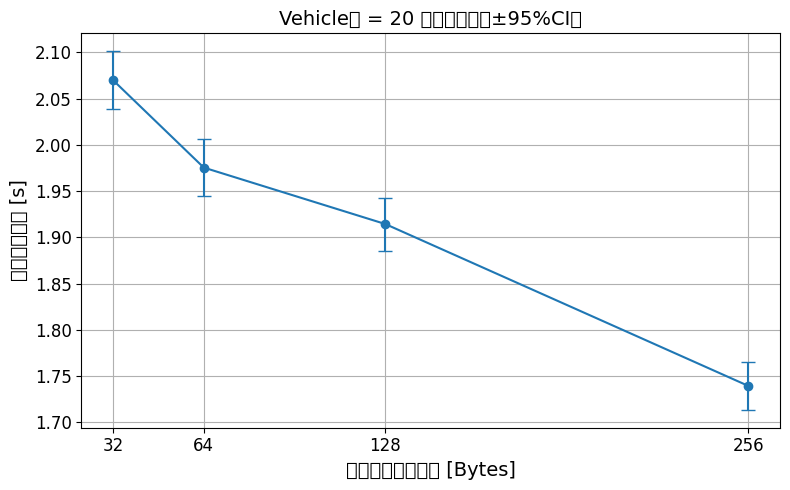

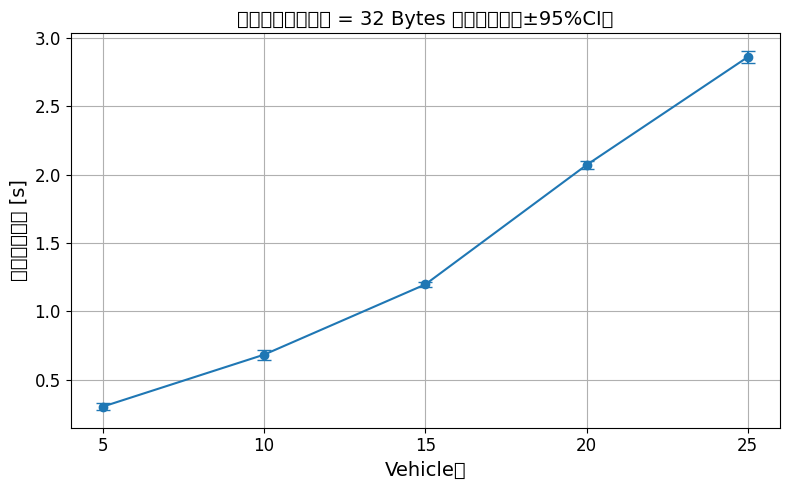

In [9]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from statistics import mean, stdev
import math
import os

# =========================================================
# 元の関数（変更なし）
# =========================================================
def get_consensus_time(input_folder_path):

    # CSVファイルの読み込み
    proposer_df = pd.read_csv(input_folder_path + "consensus_folder.csv")
    proposer_df = proposer_df.replace('null', pd.NA)

    # 結果を格納するリスト
    result = []
    simulation_buffer_time = 200
    simulation_start_time = 0
    simulation_time_list = []
    simulation_consensus_time_list = []

    # idごとに処理を行う
    for index, row in proposer_df.iterrows():
        if index == 0:
            simulation_start_time = int(row["start_time"])

        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue  # Skip rows with NaN values
        
        simulation_now_time = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time

        simulation_time_list.append(simulation_now_time)
        simulation_consensus_time_list.append(int(row["duration"]) / 1000)
    
    return simulation_time_list, simulation_consensus_time_list


# =========================================================
# パラメータ（元コード準拠）
# =========================================================
fixed_vehicle_num_list = [5, 10, 15, 20, 25]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size_list = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1

# =========================================================
# 95%信頼区間（平均±CI半幅）: t分布(表)→なければ1.96にフォールバック
# =========================================================
_tcrit_95_two_tailed = {
    # df: t*
    1: 12.706, 2: 4.303, 3: 3.182, 4: 2.776, 5: 2.571,
    6: 2.447, 7: 2.365, 8: 2.306, 9: 2.262, 10: 2.228,
    11: 2.201, 12: 2.179, 13: 2.160, 14: 2.145, 15: 2.131,
    16: 2.120, 17: 2.110, 18: 2.101, 19: 2.093, 20: 2.086,
    21: 2.080, 22: 2.074, 23: 2.069, 24: 2.064, 25: 2.060,
    26: 2.056, 27: 2.052, 28: 2.048, 29: 2.045, 30: 2.042
}
def mean_and_ci_95(samples):
    n = len(samples)
    if n == 0:
        return float("nan"), 0.0, 0
    m = mean(samples)
    if n == 1:
        return m, 0.0, 1  # CIは出せないので0表示
    sd = stdev(samples)
    se = sd / math.sqrt(n)
    df = n - 1
    tcrit = _tcrit_95_two_tailed.get(df, 1.96)  # df>30は≈1.96で近似
    half = tcrit * se
    return m, half, n

# =========================================================
# ① vehicle_num=20固定で message_size を変更
# =========================================================
fixed_vehicle_num_for_plot1 = 20
msg_sizes = message_size_list[:]  # [32, 64, 128, 256]
means_1, ci_1, ns_1 = [], [], []

for ms in msg_sizes:
    input_folder_path = (
        "../../results/multi_rsu_congestion_fixed_vehicle_num/"
        f"fixed_v{fixed_vehicle_num_for_plot1}/n{participant_size}/m{ms}/"
        f"d{network_delay}/{proposer_id}/"
    )
    if not os.path.exists(input_folder_path):
        print(f"[WARN] path not found: {input_folder_path}")
        means_1.append(float("nan")); ci_1.append(0.0); ns_1.append(0)
        continue

    _, consensus_times = get_consensus_time(input_folder_path)
    m, hw, n = mean_and_ci_95(consensus_times)
    means_1.append(m); ci_1.append(hw); ns_1.append(n)

plt.figure(figsize=(8,5))
plt.errorbar(msg_sizes, means_1, yerr=ci_1, fmt='-o', capsize=5, elinewidth=1.5)
plt.xlabel('メッセージサイズ [Bytes]', fontsize=14)
plt.ylabel('合意形成時間 [s]', fontsize=14)
plt.title(f'Vehicle数 = {fixed_vehicle_num_for_plot1} のとき（平均±95%CI）', fontsize=14)
plt.xticks(msg_sizes, fontsize=12); plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
# 保存したい場合は以下を有効化
# plt.savefig("consensus_time_vehicle20_vs_message_size.png", dpi=200)

print("=== vehicle_num=20, message_size別 ===")
for ms, m, hw, n in zip(msg_sizes, means_1, ci_1, ns_1):
    print(f"message_size={ms:>3}B: mean={m:.3f}s, 95%CI±{hw:.3f}s, n={n}")

# =========================================================
# ② message_size=32固定で vehicle_num を変更
# =========================================================
fixed_message_size_for_plot2 = 32
veh_nums = fixed_vehicle_num_list[:]  # [5, 10, 15, 20, 25, 30]
means_2, ci_2, ns_2 = [], [], []

for vnum in veh_nums:
    input_folder_path = (
        "../../results/multi_rsu_congestion_fixed_vehicle_num/"
        f"fixed_v{vnum}/n{participant_size}/m{fixed_message_size_for_plot2}/"
        f"d{network_delay}/{proposer_id}/"
    )
    if not os.path.exists(input_folder_path):
        print(f"[WARN] path not found: {input_folder_path}")
        means_2.append(float("nan")); ci_2.append(0.0); ns_2.append(0)
        continue

    _, consensus_times = get_consensus_time(input_folder_path)
    m, hw, n = mean_and_ci_95(consensus_times)
    means_2.append(m); ci_2.append(hw); ns_2.append(n)

plt.figure(figsize=(8,5))
plt.errorbar(veh_nums, means_2, yerr=ci_2, fmt='-o', capsize=5, elinewidth=1.5)
plt.xlabel('Vehicle数', fontsize=14)
plt.ylabel('合意形成時間 [s]', fontsize=14)
plt.title(f'メッセージサイズ = {fixed_message_size_for_plot2} Bytes のとき（平均±95%CI）', fontsize=14)
plt.xticks(veh_nums, fontsize=12); plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
# 保存したい場合は以下を有効化
# plt.savefig("consensus_time_msg32_vs_vehicle_num.png", dpi=200)

print("\n=== message_size=32, vehicle_num別 ===")
for v, m, hw, n in zip(veh_nums, means_2, ci_2, ns_2):
    print(f"vehicle_num={v:>2}: mean={m:.3f}s, 95%CI±{hw:.3f}s, n={n}")


重ね書き

/tmp/ipykernel_7171/3984055610.py:93: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(


=== Figure 1: Vehicles = 10/15/20 by message size ===
[Vehicles=10] message_size= 32B: mean=0.684s, 95%CI±0.036s, n=247
[Vehicles=10] message_size= 64B: mean=0.598s, 95%CI±0.025s, n=249
[Vehicles=10] message_size=128B: mean=0.557s, 95%CI±0.028s, n=249
[Vehicles=10] message_size=256B: mean=0.408s, 95%CI±0.014s, n=257
[Vehicles=15] message_size= 32B: mean=1.198s, 95%CI±0.018s, n=1018
[Vehicles=15] message_size= 64B: mean=1.315s, 95%CI±0.027s, n=992
[Vehicles=15] message_size=128B: mean=1.220s, 95%CI±0.025s, n=1020
[Vehicles=15] message_size=256B: mean=1.018s, 95%CI±0.023s, n=511
[Vehicles=20] message_size= 32B: mean=2.070s, 95%CI±0.031s, n=862
[Vehicles=20] message_size= 64B: mean=1.976s, 95%CI±0.031s, n=858
[Vehicles=20] message_size=128B: mean=1.915s, 95%CI±0.029s, n=857
[Vehicles=20] message_size=256B: mean=1.740s, 95%CI±0.026s, n=871


/tmp/ipykernel_7171/3984055610.py:140: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(



=== Figure 2: message size = 32/64/128 by participant node size ===
[message_size= 32B] participant_node_size= 5: mean=0.305s, 95%CI±0.023s, n=113
[message_size= 32B] participant_node_size=10: mean=0.684s, 95%CI±0.036s, n=247
[message_size= 32B] participant_node_size=15: mean=1.198s, 95%CI±0.018s, n=1018
[message_size= 32B] participant_node_size=20: mean=2.070s, 95%CI±0.031s, n=862
[message_size= 32B] participant_node_size=25: mean=2.859s, 95%CI±0.042s, n=1162
[message_size= 64B] participant_node_size= 5: mean=0.340s, 95%CI±0.036s, n=111
[message_size= 64B] participant_node_size=10: mean=0.598s, 95%CI±0.025s, n=249
[message_size= 64B] participant_node_size=15: mean=1.315s, 95%CI±0.027s, n=992
[message_size= 64B] participant_node_size=20: mean=1.976s, 95%CI±0.031s, n=858
[message_size= 64B] participant_node_size=25: mean=2.754s, 95%CI±0.040s, n=1173
[message_size=128B] participant_node_size= 5: mean=0.292s, 95%CI±0.037s, n=103
[message_size=128B] participant_node_size=10: mean=0.557s, 

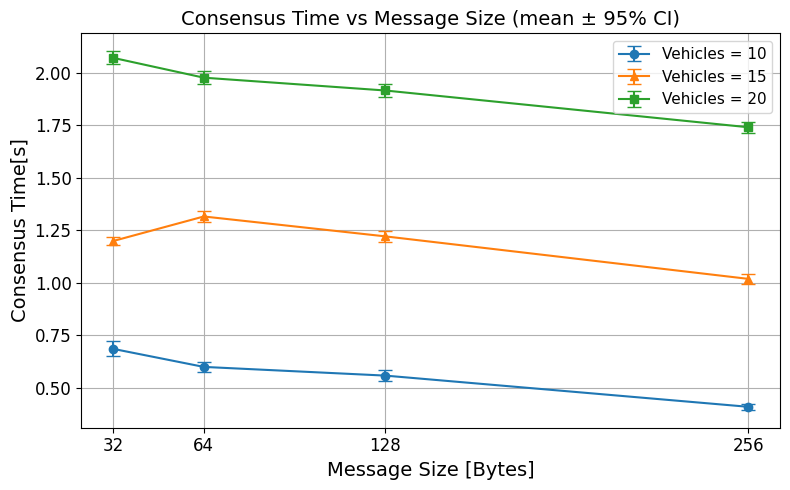

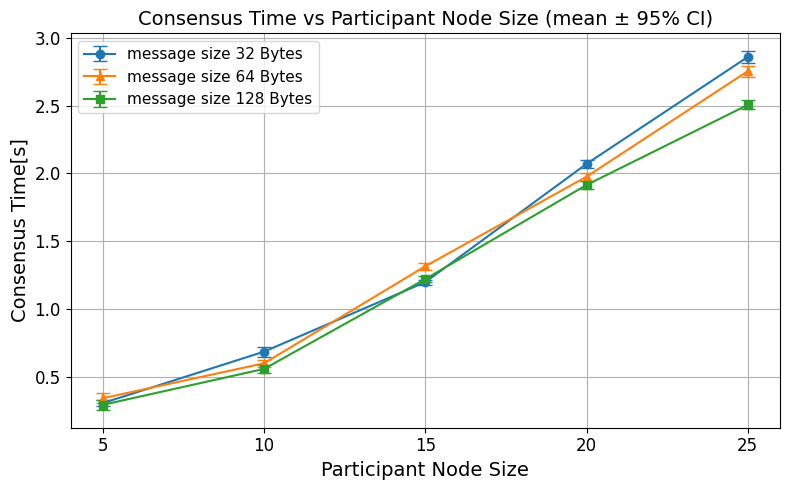

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, stdev
import math
import os

# =========================================================
# Loader (unchanged logic)
# =========================================================
def get_consensus_time(input_folder_path):
    df = pd.read_csv(os.path.join(input_folder_path, "consensus_folder.csv"))
    df = df.replace('null', pd.NA)

    simulation_buffer_time = 200
    simulation_start_time = 0
    t_axis = []
    consensus_times = []

    for idx, row in df.iterrows():
        if idx == 0:
            simulation_start_time = int(row["start_time"])
        if pd.isna(row["end_time"]) or pd.isna(row["duration"]):
            continue
        now_t = (int(row["end_time"]) - simulation_start_time) / 1000 + simulation_buffer_time
        t_axis.append(now_t)
        consensus_times.append(int(row["duration"]) / 1000)

    return t_axis, consensus_times

# =========================================================
# Params
# =========================================================
fixed_vehicle_num_list = [5, 10, 15, 20, 25]
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size_list = [32, 64, 128, 256]
network_delay = 0
proposer_id = 1
ROOT = "../../results/multi_rsu_congestion_fixed_vehicle_num"

# =========================================================
# 95% CI (mean ± half-width)
# =========================================================
_tcrit_95_two_tailed = {
    1: 12.706, 2: 4.303, 3: 3.182, 4: 2.776, 5: 2.571, 6: 2.447, 7: 2.365,
    8: 2.306, 9: 2.262, 10: 2.228, 11: 2.201, 12: 2.179, 13: 2.160, 14: 2.145,
    15: 2.131, 16: 2.120, 17: 2.110, 18: 2.101, 19: 2.093, 20: 2.086, 21: 2.080,
    22: 2.074, 23: 2.069, 24: 2.064, 25: 2.060, 26: 2.056, 27: 2.052, 28: 2.048,
    29: 2.045, 30: 2.042
}
def mean_and_ci_95(samples):
    n = len(samples)
    if n == 0:
        return float("nan"), 0.0, 0
    m = mean(samples)
    if n == 1:
        return m, 0.0, 1
    sd = stdev(samples)
    se = sd / math.sqrt(n)
    df = n - 1
    tcrit = _tcrit_95_two_tailed.get(df, 1.96)
    half = tcrit * se
    return m, half, n

# =========================================================
# Figure 1: overlay Vehicles = 10 / 15 / 20 (x: Message Size [Bytes])
# =========================================================
vehicle_nums_for_plot1 = [10, 15, 20]
msg_sizes = message_size_list[:]  # [32, 64, 128, 256]
series_by_vnum = {}

for vnum in vehicle_nums_for_plot1:
    means, cis, ns = [], [], []
    for ms in msg_sizes:
        input_folder_path = os.path.join(
            ROOT, f"fixed_v{vnum}", f"n{participant_size}",
            f"m{ms}", f"d{network_delay}", f"{proposer_id}"
        )
        if not os.path.exists(input_folder_path):
            print(f"[WARN] path not found: {input_folder_path}")
            means.append(float("nan")); cis.append(0.0); ns.append(0)
            continue
        _, times = get_consensus_time(input_folder_path)
        m, hw, n = mean_and_ci_95(times)
        means.append(m); cis.append(hw); ns.append(n)
    series_by_vnum[vnum] = (means, cis, ns)

plt.figure(figsize=(8,5))
markers_v = {10: 'o', 15: '^', 20: 's'}
for vnum in vehicle_nums_for_plot1:
    means, cis, ns = series_by_vnum[vnum]
    plt.errorbar(
        msg_sizes, means, yerr=cis, fmt='-o', marker=markers_v.get(vnum, 'o'),
        capsize=5, elinewidth=1.5, label=f'Vehicles = {vnum}'
    )

plt.xlabel('Message Size [Bytes]', fontsize=14)
plt.ylabel('Consensus Time[s]', fontsize=14)
plt.title('Consensus Time vs Message Size (mean ± 95% CI)', fontsize=14)
plt.xticks(msg_sizes, fontsize=12); plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=11)
plt.tight_layout()
# plt.savefig("consensus_time_vs_message_size_vehicles_10_15_20.png", dpi=200)

print("=== Figure 1: Vehicles = 10/15/20 by message size ===")
for vnum in vehicle_nums_for_plot1:
    means, cis, ns = series_by_vnum[vnum]
    for ms, m, hw, n in zip(msg_sizes, means, cis, ns):
        print(f"[Vehicles={vnum:>2}] message_size={ms:>3}B: mean={m:.3f}s, 95%CI±{hw:.3f}s, n={n}")

# =========================================================
# Figure 2: overlay message size 32/64/128 (x: Participant Node Size)
# =========================================================
veh_nums = fixed_vehicle_num_list[:]  # [5, 10, 15, 20, 25]
message_sizes_for_plot2 = [32, 64, 128]  # add 256 if needed
series_by_ms = {}

for ms in message_sizes_for_plot2:
    means, cis, ns = [], [], []
    for vnum in veh_nums:
        input_folder_path = os.path.join(
            ROOT, f"fixed_v{vnum}", f"n{participant_size}",
            f"m{ms}", f"d{network_delay}", f"{proposer_id}"
        )
        if not os.path.exists(input_folder_path):
            print(f"[WARN] path not found: {input_folder_path}")
            means.append(float("nan")); cis.append(0.0); ns.append(0)
            continue
        _, times = get_consensus_time(input_folder_path)
        m, hw, n = mean_and_ci_95(times)
        means.append(m); cis.append(hw); ns.append(n)
    series_by_ms[ms] = (means, cis, ns)

plt.figure(figsize=(8,5))
markers_ms = {32: 'o', 64: '^', 128: 's', 256: 'D'}
for ms in message_sizes_for_plot2:
    means, cis, ns = series_by_ms[ms]
    plt.errorbar(
        veh_nums, means, yerr=cis, fmt='-o', marker=markers_ms.get(ms, 'o'),
        capsize=5, elinewidth=1.5, label=f'message size {ms} Bytes'
    )

plt.xlabel('Participant Node Size', fontsize=14)
plt.ylabel('Consensus Time[s]', fontsize=14)
plt.title('Consensus Time vs Participant Node Size (mean ± 95% CI)', fontsize=14)
plt.xticks(veh_nums, fontsize=12); plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=11)
plt.tight_layout()
# plt.savefig("consensus_time_vs_participant_node_size_msg_32_64_128.png", dpi=200)

print("\n=== Figure 2: message size = 32/64/128 by participant node size ===")
for ms in message_sizes_for_plot2:
    means, cis, ns = series_by_ms[ms]
    for v, m, hw, n in zip(veh_nums, means, cis, ns):
        print(f"[message_size={ms:>3}B] participant_node_size={v:>2}: mean={m:.3f}s, 95%CI±{hw:.3f}s, n={n}")

# plt.show()


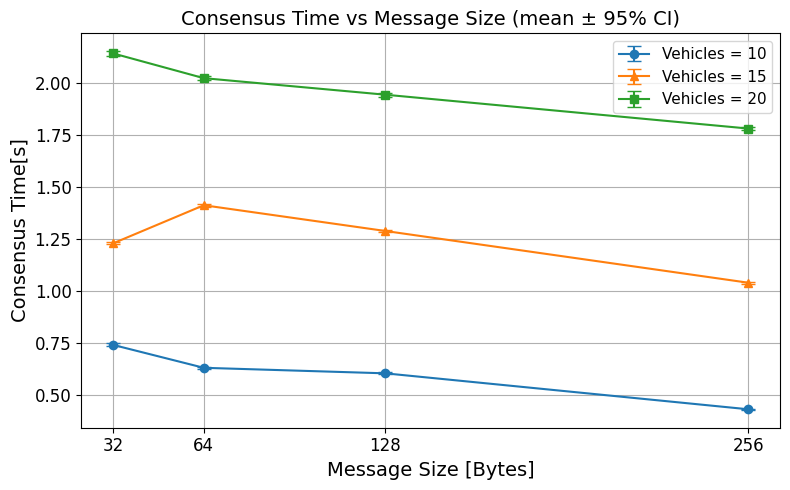
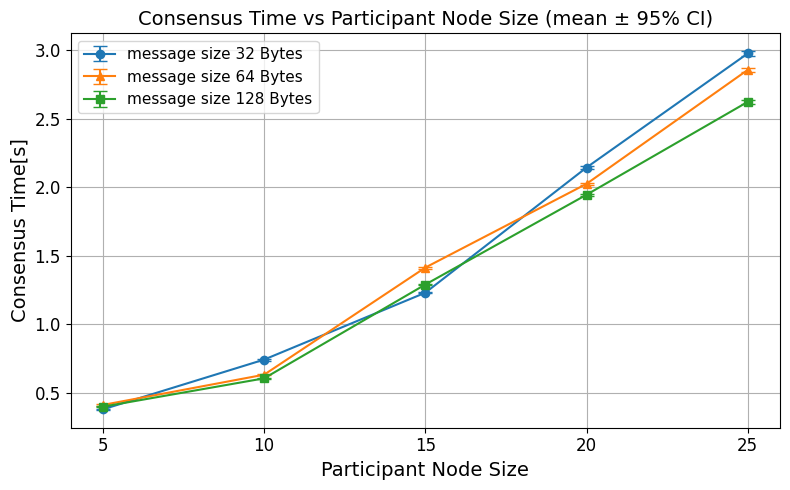

CDF(Cumulative Distribution Function)のプロット

In [9]:
import numpy as np
from scipy.stats import norm

# vehicle_speed_list = [40, 50, 60, 70, 80]
vehicle_speed = 80
min_vehicle_speed = 20
proposer_num = 3
validator_num = 250
participant_size = proposer_num + validator_num
message_size = 32
network_delay = 0
proposer_id_list = [0, 1, 2]

start_time_2lists_no_rl = []
consensus_time_2lists_no_rl = []
start_time_2lists_with_rl = []
consensus_time_2lists_with_rl = []

for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_no_rl.append(start_time_list)
    consensus_time_2lists_no_rl.append(consensus_time_list)


for proposer_id in proposer_id_list:
    input_folder_path = "../../results/multi_rsu_congestion_with_immu/vs"  + str(vehicle_speed) + "_" + str(min_vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/" + str(proposer_id) + "/"
    start_time_list, consensus_time_list = get_consensus_time(input_folder_path)
    start_time_2lists_with_rl.append(start_time_list)
    consensus_time_2lists_with_rl.append(consensus_time_list)


# # データをソート
# sorted_data = np.sort(consensus_time_list)
# # 経験的なCDFの計算
# cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# # プロット
# plt.figure(figsize=(8, 5))
# plt.plot(sorted_data, cdf_values, marker='o', linestyle='-', color='b', label="Empirical CDF")


# plt.xlabel("Data values")
# plt.ylabel("CDF")
# plt.title("Cumulative Distribution Function (CDF)")
# plt.grid(True)
# plt.legend()
# plt.show()




# plt.figure(figsize=(10, 6))

# # consensus_time_2lists_no_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='-', label=f"No RL Proposer {i}")

# # consensus_time_2lists_with_rl のプロット
# for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
#     sorted_data = np.sort(consensus_time_list)
#     cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
#     plt.plot(sorted_data, cdf_values, linestyle='--', label=f"With RL Proposer {i}")


# # グラフの詳細設定（フォントサイズの調整）
# plt.xlabel("Consensus Time", fontsize=14)
# plt.ylabel("CDF", fontsize=14)
# plt.title("Cumulative Distribution Function (CDF) for Consensus Times", fontsize=16)
# plt.xlim(0, 30)  # X軸の最大値を30に設定
# plt.grid(True)
# plt.legend(fontsize=12)
# plt.show()


# 色のリスト
colors = ['b', 'g', 'r']  # プロポーザごとに異なる色を設定

# CDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='--', color=colors[i], label=f"No RL CDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, cdf_values, linestyle='-', color=colors[i], label=f"With RL CDF Proposer {i}")

plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.title("CDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True)
plt.legend(fontsize=10)
plt.show()

# CCDFのプロット
plt.figure(figsize=(10, 6))
for i, consensus_time_list in enumerate(consensus_time_2lists_no_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='--', color=colors[i], label=f"No RL CCDF Proposer {i}")

for i, consensus_time_list in enumerate(consensus_time_2lists_with_rl):
    sorted_data = np.sort(consensus_time_list)
    cdf_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ccdf_values = 1 - cdf_values
    plt.plot(sorted_data, ccdf_values, linestyle='-', color=colors[i], label=f"With RL CCDF Proposer {i}")

# 縦軸を対数スケールに設定
plt.yscale("log")

# グラフの詳細設定
plt.xlabel("Consensus Time(s)", fontsize=14)
plt.ylabel("CCDF", fontsize=14)
plt.title("CCDF for Consensus Times", fontsize=20)
plt.xlim(0, 40)  # X軸の最大値を30に設定
plt.grid(True, which="both", linestyle="--", linewidth=0.5)  # 対数スケールで両方の目盛り線を表示
plt.legend(fontsize=10)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../results/multi_rsu_congestion/vs80_20/n253/m32/d0/0/ordering_event.csv'